In [1]:
label = ['비행기','자동차','새','고양이','사슴','개','개구리','말','배','트럭']
label_eng = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [2]:
import tensorflow as tf
from tensorflow import keras

In [3]:
# 데이터 로딩
(train_image, train_label), (test_image, test_label) = keras.datasets.cifar10.load_data()

170500096/170498071 [==============================] - 4s 0us/step


In [8]:
train_image.shape, test_image.shape, train_label.shape, test_label.shape

((50000, 32, 32, 3), (10000, 32, 32, 3), (50000, 1), (10000, 1))

In [5]:
import numpy as np
np.unique(train_label, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000]))

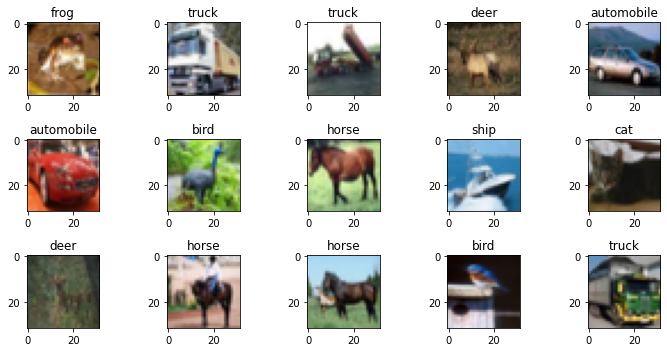

In [7]:
# 15개 이미지 확인
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
for i in range(15):
    plt.subplot(3, 5, i+1)
    plt.imshow(train_image[i])
    plt.title(label_eng[train_label[i][0]])
plt.tight_layout()
plt.show()

In [9]:
N_EPOCHS = 20
N_BATCHS = 100
LEARNING_RATE = 0.001
N_CLASS = 10

In [10]:
X_train, X_test = train_image/255., test_image/255.
y_train, y_test = train_label, test_label

In [13]:
N_TRAIN = train_image.shape[0]
N_TEST = test_image.shape[0]

In [14]:
# dataset 구성
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train)).shuffle(N_TRAIN).batch(N_BATCHS, drop_remainder=True).repeat()
test_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test)).batch(N_BATCHS)

In [60]:
def create_model():
    model = keras.Sequential()
    model.add(keras.layers.Input((32, 32, 3)))

    model.add(keras.layers.Conv2D(filters=32,
                                  kernel_size=3,
                                  padding='same',
                                  strides=1,
                                  activation='relu'
                                 ))
    model.add(keras.layers.Conv2D(filters=48,
                                  kernel_size=3,
                                  padding='same',
                                  strides=1,
                                  activation='relu'
                                 ))
    model.add(keras.layers.MaxPool2D(pool_size=(2, 2),
                                     strides=1,
                                     padding='same'
                                    ))
    
    model.add(keras.layers.Conv2D(filters=64,
                                  kernel_size=3,
                                  padding='same',
                                  strides=1,
                                  activation='relu'
                                 ))
    model.add(keras.layers.Conv2D(filters=96,
                                  kernel_size=3,
                                  padding='same',
                                  strides=1,
                                  activation='relu'
                                 ))
    model.add(keras.layers.MaxPool2D(pool_size=(2, 2),
                                     strides=1,
                                     padding='same'
                                    ))
    
    model.add(keras.layers.Conv2D(filters=128,
                                  kernel_size=3,
                                  padding='same',
                                  strides=1,
                                  activation='relu'
                                 ))
    model.add(keras.layers.Conv2D(filters=192,
                                  kernel_size=3,
                                  padding='same',
                                  strides=1,
                                  activation='relu'
                                 ))
    model.add(keras.layers.MaxPool2D(pool_size=(2, 2),
                                     strides=1,
                                     padding='same'
                                    ))
    
    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(512, activation='relu'))
    model.add(keras.layers.Dense(128, activation='relu'))

    model.add(keras.layers.Dense(N_CLASS, activation='softmax'))

    return model

In [61]:
model = create_model()
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_20 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 32, 32, 48)        13872     
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 32, 32, 48)        0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 32, 32, 64)        27712     
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 32, 32, 96)        55392     
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 32, 32, 96)        0         
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 32, 32, 128)      

In [63]:
model.compile(optimizer=keras.optimizers.Adam(learning_rate=LEARNING_RATE),
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy']
               )

In [64]:
# lr_scheduler = keras.optimizers.schedules.ExponentialDecay(
#                                           initial_learning_rate=LEARNING_RATE,  # 시작 학습률
#                                           decay_steps=steps_per_epoch*5,  # 학습률을 몇 step마다 변경시킬 것인지, 10 epoch마다 변경
#                                           decay_rate=0.6,  # 학습률의 변화율. (기존학습률 * 지정한 값)
#                                           staircase=True,  # True: 한번에 변경, False: 매 스텝마다 조금씩 변경 
# )

In [65]:
# model.compile(optimizer=keras.optimizers.Adam(learning_rate=lr_scheduler), 
#               loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [66]:
steps_per_epoch = N_TRAIN // N_BATCHS
validation_epochs = int(np.ceil(N_TEST / N_BATCHS))

history = model.fit(train_dataset,
                    epochs=N_EPOCHS,
                    steps_per_epoch=steps_per_epoch,
                    validation_data=test_dataset,
                    validation_steps=validation_epochs)

Epoch 1/20
500/500 [==============================] - 30s 57ms/step - loss: 1.8747 - accuracy: 0.3306 - val_loss: 1.1589 - val_accuracy: 0.5797
Epoch 2/20
500/500 [==============================] - 29s 57ms/step - loss: 1.0879 - accuracy: 0.6116 - val_loss: 1.0575 - val_accuracy: 0.6214
Epoch 3/20
500/500 [==============================] - 29s 57ms/step - loss: 0.8152 - accuracy: 0.7102 - val_loss: 0.8864 - val_accuracy: 0.6939
Epoch 4/20
500/500 [==============================] - 29s 57ms/step - loss: 0.5895 - accuracy: 0.7895 - val_loss: 0.8428 - val_accuracy: 0.7182
Epoch 5/20
500/500 [==============================] - 29s 57ms/step - loss: 0.3654 - accuracy: 0.8720 - val_loss: 0.9846 - val_accuracy: 0.7108
Epoch 6/20
500/500 [==============================] - 29s 57ms/step - loss: 0.2086 - accuracy: 0.9280 - val_loss: 1.2081 - val_accuracy: 0.7034
Epoch 7/20
500/500 [==============================] - 29s 57ms/step - loss: 0.1289 - accuracy: 0.9566 - val_loss: 1.3156 - val_accuracy:

KeyboardInterrupt: ignored